### Matplotlib - Exemplos básicos
Essa biblioteca permite criar diversos tipos de visualização gráfica de dados. Especialmente intuitiva para quem já utilizou Matlab.

**Método para não expor usuário e senha do EPM no código fonte**

In [1]:
import getpass
user = input('EPM user:')
password = getpass.getpass("EPM password:")

EPM user:sa
EPM password:········


In [2]:
import epmwebapi as epm
import numpy as np
import datetime
import matplotlib.pyplot as plt

#crie o objeto de conexão informando os endereços do EPM Webserver(Authentication Port e WEB API Port), usuário e senha.
connection = epm.EpmConnection('http://localhost:44333', 'http://localhost:44332', user, password)

wind = 'SP01_WindSpeedAvg'
initime = datetime.datetime(2014, 3, 1, 0, 0, 0, 0)
endtime = initime + datetime.timedelta(days=5)

bv_wind = connection.getDataObjects([wind])


queryperiod = epm.QueryPeriod(initime, endtime)
processInterval = datetime.timedelta(seconds=600)
aggregationdetails = epm.AggregateDetails(processInterval, epm.AggregateType.Interpolative)


wind_data = bv_wind[wind].historyReadAggregate(aggregationdetails, queryperiod)

**Gráfico de linha**

Nesse caso, utilizado para verificar o comportamento da variável ao longo do tempo.

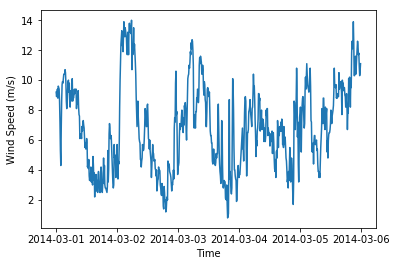

In [2]:
plt.xlabel('Time')
plt.ylabel('Wind Speed (m/s)')
plt.plot(wind_data['Timestamp'],wind_data['Value'])

**Histograma**

Utilizado para verificar a distribuição de valores.

(array([ 7., 23., 67., 70., 59., 67., 88., 66., 69., 70., 53., 24., 23.,
        21., 13.]),
 array([ 0.8      ,  1.6800001,  2.56     ,  3.44     ,  4.32     ,
         5.2      ,  6.08     ,  6.96     ,  7.84     ,  8.72     ,
         9.6      , 10.48     , 11.36     , 12.24     , 13.12     ,
        14.       ], dtype=float32),
 <a list of 15 Patch objects>)

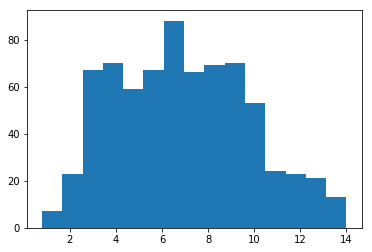

In [3]:
plt.hist(wind_data['Value'], bins = 15)

**Gráfico de dispersão**

Para esse gráfico vamos relacionar duas variáveis.

In [4]:
power = 'SP01_PowerAvg'

bv_power = connection.getDataObjects([power])
power_data = bv_power[power].historyReadAggregate(aggregationdetails, queryperiod)


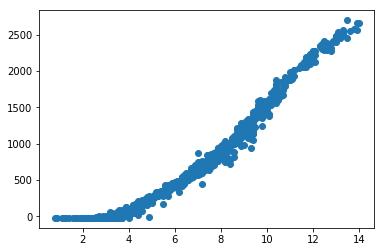

In [5]:
plt.scatter(wind_data['Value'],power_data['Value'])

**Criando vários gráficos em uma só imagem**

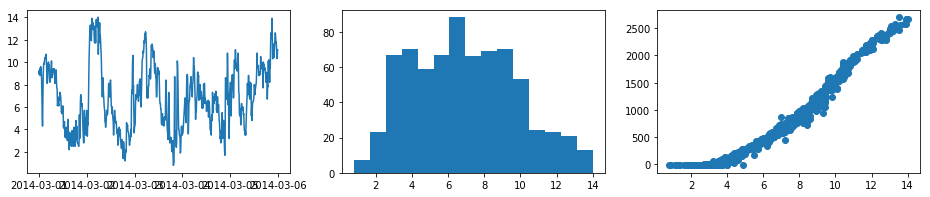

In [6]:
#Criaremos 3 gráficos em 1 linha
fig, axs = plt.subplots(1, 3,figsize=(16, 3))
axs[0].plot(wind_data['Timestamp'], wind_data['Value'])
axs[1].hist(wind_data['Value'], bins=15)
axs[2].scatter(wind_data['Value'], power_data['Value'])



**Ajustes visuais**

Text(0, 0.5, 'Power (MW)')

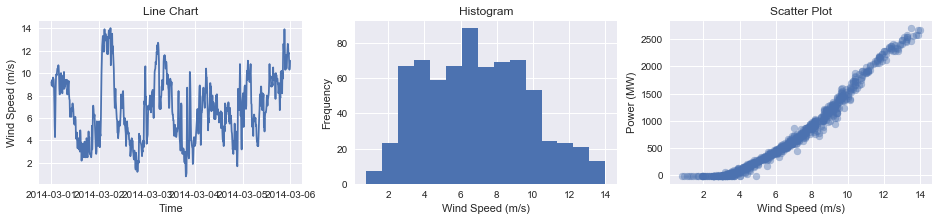

In [7]:
#ajustando estilo
plt.style.use('seaborn')

fig, axs = plt.subplots(1, 3, figsize=(16, 3))


axs[0].plot(wind_data['Timestamp'], wind_data['Value'])
axs[0].set_title('Line Chart')
axs[0].set_xlabel('Time')
axs[0].set_ylabel('Wind Speed (m/s)')

axs[1].hist(wind_data['Value'], bins=15)
axs[1].set_title('Histogram')
axs[1].set_xlabel('Wind Speed (m/s)')
axs[1].set_ylabel('Frequency')

axs[2].scatter(wind_data['Value'], power_data['Value'], alpha=0.4)
axs[2].set_title('Scatter Plot')
axs[2].set_xlabel('Wind Speed (m/s)')
axs[2].set_ylabel('Power (MW)')



**Mostrando anotações no gráfico de linha**

O EPM tem suporte a anotações em variáveis. 

(20, 30)

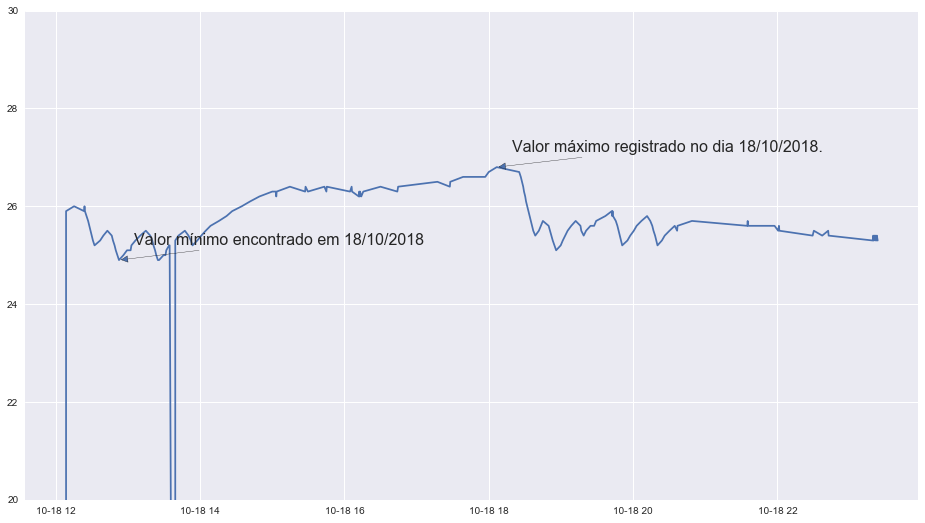

In [88]:
bvname = 'ADM_Temperature'

bv = connection.getDataObjects([bvname])

end_date = datetime.date(2018, 10, 19)
ini_date = end_date - datetime.timedelta(hours=24)

queryPeriod = epm.QueryPeriod(ini_date,end_date)
#lendo os dados para o gráfico de linha
data = bv[bvname].historyReadRaw(queryPeriod)

#lendo as anotações do período
annotations = bv[bvname].readAnnotations(ini_date,end_date)

#procurando o Timestamp no ndarray 'data' mais próximo do Timestamp onde as anotações foram colocadas 
import bisect
def nearest(dates_list, date):
    # Given a presorted list of timestamps:  dates_list = sorted(index)
    return bisect.bisect_left(dates_list, date)    


#gerando o gráfico
plt.style.use('seaborn')
fig, ax = plt.subplots(figsize=(16,9))

line, = ax.plot(data['Timestamp'], data['Value'])

nearest_timestamp_index = []
for annotation in range(len(annotations)):
    nearest_timestamp_index = nearest(data['Timestamp'], annotations[annotation][0])
    
    ax.annotate(annotations[annotation][2],
            (data['Timestamp'][nearest_timestamp_index], data['Value'][nearest_timestamp_index]),
             xytext=(15, 15), 
             textcoords='offset points',
             arrowprops=dict(arrowstyle='-|>'),size=16)   

ax.set_ylim(20,30)


In [ ]:
#fechando a conexão
connection.close()